# Project: Electrocardiography (EKG) (ECG)


In [188]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.signal as signal
import numpy 


The objective of this article is to present an easy-to-understand analysis of EKG data. The code in this article is written in Python and is free to use. If you would prefer to just look at the final result, you can view the final [source](https://stackoverflow.com/questions/4387878/simulator-of-realistic-ecg-signal-from-rr-data-for-matlab-or-python/33737898#33737898) here.

### What is electrocardiography (EKG)

Electrocardiography is the process of producing an electrocardiogram (ECG or EKG). It is a graph of voltage versus time of the electrical activity of the heart using electrodes placed on the skin. These electrodes detect the small electrical changes that are a consequence of cardiac muscle depolarization followed by repolarization during each cardiac cycle (heartbeat). 

Changes in the normal ECG pattern occur in numerous cardiac abnormalities, including cardiac rhythm disturbances (such as atrial fibrillation and ventricular tachycardia), inadequate coronary artery blood flow (such as myocardial ischemia and myocardial infarction), and electrolyte disturbances (such as hypokalemia and hyperkalemia). For more detailed information please see [a link](https://en.wikipedia.org/wiki/Electrocardiography) to Wikipedia.



The ElectroCardioGram (ECG) is a periodic waveform that describes the action of heart as it moves through 3 electromechanical phases:

* Depolarization and contraction of the atria
* Depolarization and contraction of the ventricles
* Repolarization of the ventricles and atria

It is an enormous area of study and the ECG is tractable and effective way of detecting healthy sinus rythmn, diagnosing arrthymia and potentially predicting the decline of the heart from a healthy state to a disease state. 

##### Analyze EKG data
The mathematical methods can be used for the analysis of electrocardiographic data, specifically based on an essential diagnostic parameter, such as heart rate variability (HRV). 

The HRV is one of the noninvasive method for measuring the heart rate parameters and analysis of cardiac activity. The mathematical research methods for analyzing the HRV are developed in two directions: 
1. Linear and; 
2. Nonlinear. 

Linear methods are typically applied for direct assessment of the HRV. They consist of time-domain, frequency-domain, and time-frequency analytical methods. The interest in nonlinear analytical methods increases due to the more detailed observation of HRV, including the information for the dynamics of their fluctuations for different periods of time. 

Nonlinear analysis of HRV is useful for obtaining comprehensive observation of long-term patient's cardiac condition. It is a new scientific approach, giving a new concept of cardiac dynamics, hence allows prediction of pathological conditions.

# Simulating Heart EKG
## Code Implementation 
The code written below, lets you set the following: heart rate bpm, length of time of capture, noise added, adc resolution and adc sampling rate

Firstly, with the following code, I am plotting a simulation of heart EKG, using "The "Daubechies" wavelet, which is a rough approximation to a real, single, heart beat ("pqrst") signal. Also I have add the gap after the pqrst when the heart is resting.



### Simulation of single, heart beat ("pqrst") signal

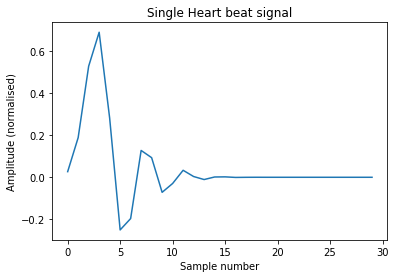

In [5]:
# The "Daubechies" wavelet is a rough approximation to a real,
# single, heart beat ("pqrst") signal
pqrst = signal.wavelets.daub(10)

# Add the gap after the pqrst when the heart is resting. 
samples_rest = 10
zero_array = numpy.zeros(samples_rest, dtype = float)
pqrst_full = numpy.concatenate([pqrst,zero_array])

# Plot the heart signal template
plt.plot(pqrst_full)
plt.xlabel('Sample number')
plt.ylabel('Amplitude (normalised)')
plt.title('Single Heart beat signal')
plt.show()

### Simulated beats per minute

With the next code, we can see a simulation of beats per minute rate (bpm). 

Heart rate, also known as pulse, is the number of times a person's heart beats per minute. Normal heart rate varies from person to person, but a normal range for adults is 60 to 100 beats per minute. For a health, athletic, person, 60 is resting, 180 is intensive exercising.

In this case we select beats per minute _(bpm)_ to be 60 and the time in seconds that the EKG is captured in to be 10. In order to define these parameters, we have two variables, one _bmp_ and other _capture_length_. After that, in order to be able to calculate the number of beats in capture time period, we have to define another variable named _num_heart_beats_, which is the integer of _capture_length_ multiply _bps_.We get _bps_, when we divide _bpm_ by 60.

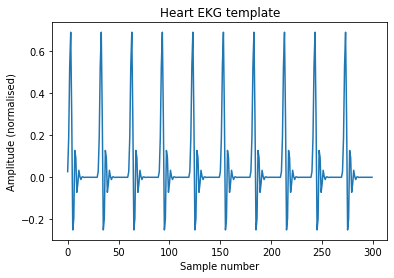

In [28]:
# Simulated Beats per minute rate
# For a health, athletic, person, 60 is resting, 180 is intensive exercising
bpm = 60
bps = bpm / 60

# Simumated period of time in seconds that the ecg is captured in
capture_length = 10

# Caculate the number of beats in capture time period 
# Round the number to simplify things
num_heart_beats = int(capture_length * bps)

# Concatonate together the number of heart beats needed
ecg_template = numpy.tile(pqrst_full , num_heart_beats)

# Plot the heart ECG template
plt.plot(ecg_template)
plt.xlabel('Sample number')
plt.ylabel('Amplitude (normalised)')
plt.title('Heart EKG template')
plt.show()

Here we can see the difference if we set the bpm to be bigger, for example 100 and the time capture remains 10 seconds.

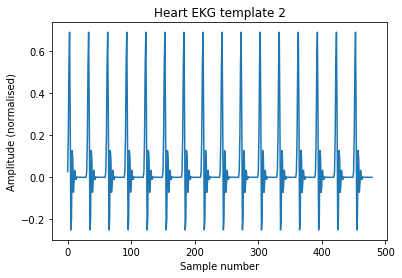

In [27]:
bpm = 100
bps = bpm / 60

capture_length = 10

num_heart_beats = int(capture_length * bps)

ecg_template = numpy.tile(pqrst_full , num_heart_beats)

plt.plot(ecg_template)
plt.xlabel('Sample number')
plt.ylabel('Amplitude (normalised)')
plt.title('Heart EKG template 2')
plt.show()

### Adding random (gaussian distributed) noise 

With the following code, we add random noise to the Heart EKG template, and we are plloting the result.

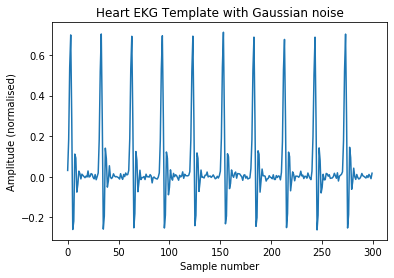

In [29]:
# Add random (gaussian distributed) noise 
noise = numpy.random.normal(0, 0.01, len(ecg_template))
ecg_template_noisy = noise + ecg_template

# Plot the noisy heart ECG template
plt.plot(ecg_template_noisy)
plt.xlabel('Sample number')
plt.ylabel('Amplitude (normalised)')
plt.title('Heart EKG Template with Gaussian noise')
plt.show()

### Simulate an ADC by sampling the noisy EKG template to produce the values

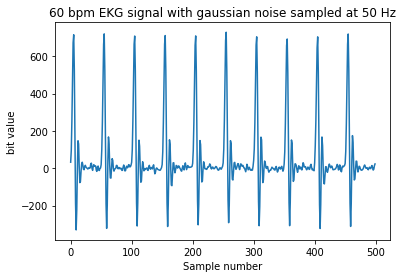

In [30]:
# Simulate an ADC by sampling the noisy ecg template to produce the values
# Might be worth checking nyquist here 
# e.g. sampling rate >= (2 * template sampling rate)
sampling_rate = 50
num_samples = sampling_rate * capture_length
ecg_sampled = signal.resample(ecg_template_noisy, num_samples)

# Scale the normalised amplitude of the sampled ecg to whatever the ADC 
# bit resolution is
# note: check if this is correct: not sure if there should be negative bit values. 
adc_bit_resolution = 1024
ecg =  adc_bit_resolution * ecg_sampled

# Plot the sampled ecg signal
plt.plot(ecg)
plt.xlabel('Sample number')
plt.ylabel('bit value')
plt.title('%d bpm EKG signal with gaussian noise sampled at %d Hz' %(bpm, sampling_rate) )
plt.show()

## Putting it all Together
Now, we take all of these functions, use them for all four graphs.

Simulating Heart EKG


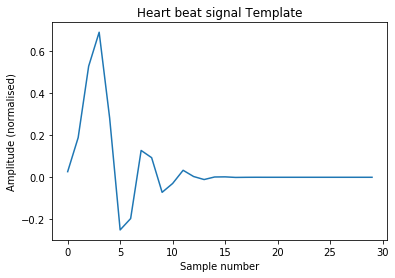

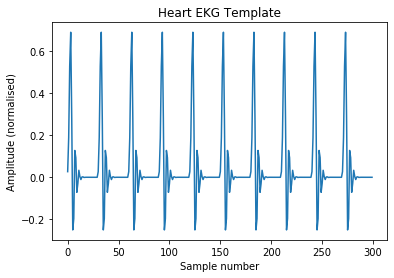

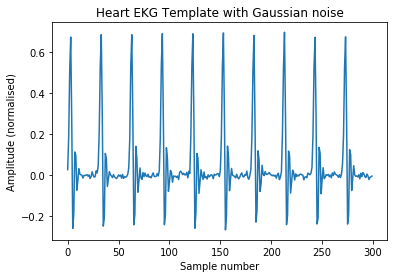

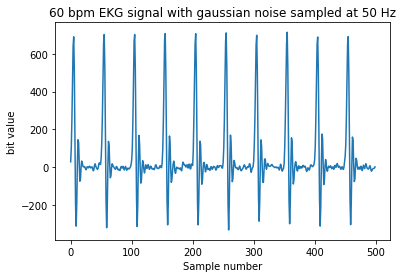

In [31]:
print('Simulating Heart EKG')

# The "Daubechies" wavelet is a rough approximation to a real,
# single, heart beat ("pqrst") signal
pqrst = signal.wavelets.daub(10)

# Add the gap after the pqrst when the heart is resting. 
samples_rest = 10
zero_array = numpy.zeros(samples_rest, dtype = float)
pqrst_full = numpy.concatenate([pqrst,zero_array])

# Plot the heart signal template
plt.plot(pqrst_full)
plt.xlabel('Sample number')
plt.ylabel('Amplitude (normalised)')
plt.title('Heart beat signal Template')
plt.show()

# Simulated Beats per minute rate
# For a health, athletic, person, 60 is resting, 180 is intensive exercising
bpm = 60
bps = bpm / 60

# Simumated period of time in seconds that the ecg is captured in
capture_length = 10

# Caculate the number of beats in capture time period 
# Round the number to simplify things
num_heart_beats = int(capture_length * bps)

# Concatonate together the number of heart beats needed
ecg_template = numpy.tile(pqrst_full , num_heart_beats)

# Plot the heart ECG template
plt.plot(ecg_template)
plt.xlabel('Sample number')
plt.ylabel('Amplitude (normalised)')
plt.title('Heart EKG Template')
plt.show()

# Add random (gaussian distributed) noise 
noise = numpy.random.normal(0, 0.01, len(ecg_template))
ecg_template_noisy = noise + ecg_template

# Plot the noisy heart ECG template
plt.plot(ecg_template_noisy)
plt.xlabel('Sample number')
plt.ylabel('Amplitude (normalised)')
plt.title('Heart EKG Template with Gaussian noise')
plt.show()


# Simulate an ADC by sampling the noisy ecg template to produce the values
# Might be worth checking nyquist here 
# e.g. sampling rate >= (2 * template sampling rate)
sampling_rate = 50
num_samples = sampling_rate * capture_length
ecg_sampled = signal.resample(ecg_template_noisy, num_samples)

# Scale the normalised amplitude of the sampled ecg to whatever the ADC 
# bit resolution is
# note: check if this is correct: not sure if there should be negative bit values. 
adc_bit_resolution = 1024
ecg =  adc_bit_resolution * ecg_sampled

# Plot the sampled ecg signal
plt.plot(ecg)
plt.xlabel('Sample number')
plt.ylabel('bit value')
plt.title('%d bpm EKG signal with gaussian noise sampled at %d Hz' %(bpm, sampling_rate) )
plt.show()

# print('saving ecg values to file')
# numpy.savetxt("ecg_values.csv", ecg, delimiter=",")
# print('Done')

### The main EKG parts

Each EKG cycles consists of 5 waves: P, Q, R, S, T corresponding to different phases of the heart activities. 

* The P wave represents the normal atrium (upper heart chambers) depolarization.The P wave occurs when both left and right atria are full of blood and the SA node fires. The signal causes both atria to contract and pump blood to the ventricles (lower chambers). Any abnormality is generally associated with the SA node and the atria. 


* The PR interval is the period, measured in milliseconds, that extends from the beginning of the P wave (the onset of atrial depolarization) until the beginning of the QRS complex (the onset of ventricular depolarization); it is normally between 120 and 200ms in duration. The PR interval is sometimes termed the PQ interval. 



* The QRS complex (one single heart beat) corresponds to the depolarization of the right and left ventricles (lower heart chambers). It is the electrical forces generated by ventricular depolarization and represents the pumping action of the ventricles.


* The ST segment marks the time for the ventricles to pump the blood to the lung and body. In normal situations, it serves as the base line from which to measure the amplitudes of the other waveforms.



* The T wave represents the re-polarization (or recovery) of the ventricles. After the contraction empties the blood in the ventricles, they begin to relax, which is marked by the T wave.

To interpret ECG, one needs to focus on the frequency (heart rate), regularity, shape and size of each individual waves and the timing and interaction between waves. The following diagram shows the components of a ECG cycle.

![The main components are presented in the following image](https://ecgreview.weebly.com/uploads/1/6/4/7/16474710/published/6532804.jpg?1546470697)

### How does the concept of "convex" / "concave" graphs relate to EKG





**Concave (also called _"Concave downward" or "Convex Upward"_ ):** In mathematics, a graph is said to be concave up at a point if the tangent line to the graph at that point lies below the graph in the vicinity of the point and concave down at a point if the tangent line lies above the graph in the vicinity of the point

**Convex (also called _"Concave upward"_ or _"Convex Downward"_ ):** In mathematics, a real-valued function defined on an n-dimensional interval is called convex (or convex downward or concave upward) if the line segment between any two points on the graph of the function lies above or on the graph.

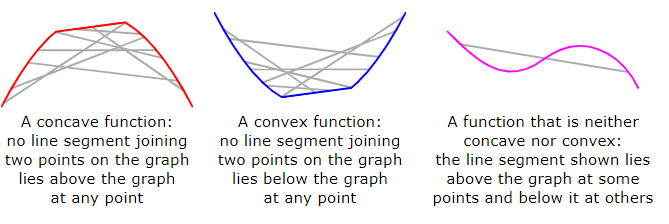

#### Convex and concave EKG 

The concept of concave and convex graphs in EKG are presented in the following image.

![The concave and convex in EKG are presented in the following image](https://www.rcemlearning.co.uk/wp-content/uploads/ST5.jpg)

### Previous research

Here are some references, that I used for my research, before writing this project.

* https://www.researchgate.net/post/How_to_analyze_an_ECG_EGG_signal
* https://www.youtube.com/watch?v=Bs-dkCxlCfI
* https://www.youtube.com/watch?v=50QzaZ9dwE8
* https://archive.physionet.org/cgi-bin/atm/ATM
* https://github.com/tejasa97/ECG-Signal-Processing/blob/master/README.md

### References

Here are some references that you can check out if you are interested:

* https://stackoverflow.com/questions/4387878/simulator-of-realistic-ecg-signal-from-rr-data-for-matlab-or-python/33737898#33737898 - This is the original algorithm.

* https://mjo.osborne.economics.utoronto.ca/index.php/tutorial/index/1/cv1/t - This article contains information about Concave and convex functions by Martin J. Osborne.

* https://www.sciencedirect.com/science/article/pii/B9780128153680000075 - This chapter is devoted to presenting the use of mathematical methods for the analysis of electrocardiographic data.

* https://www.youtube.com/watch?v=WyjGCEWU4zY - This is a video from Dr Emlyn Clay - Analyzing the ElectroCardioGram (ECG), from where I get some information about the electromechanical phases of EKG.

* https://www.amperordirect.com/pc/help-ecg-monitor/z-interpreting-ecg-2.html - This article provides an information about components of EKG.


* https://en.wikipedia.org/wiki/PR_interval - This is a article on Wikipedia, containg information about PR interval as part of EKG.